Loading the Data From CSV

In [1]:
#Import required Libraries
import pandas as pd
import tensorflow.keras.utils

DATADIR= "C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-JPEG-8/DataWMask1.csv"
Base_Dir="C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-JPEG-8/"
my_data = pd.read_csv(DATADIR)
my_paths = []
for index, row in my_data.iterrows():
    if (row['Status'] == 'Benign') | (row['Status'] == 'Cancer'):
        if not row['Tumour_Contour'] == '-':
            my_paths.append([row['fullPath'],row['Status'],row['Tumour_Contour']])
    elif row['Status'] == 'Normal':
        my_paths.append([row['fullPath'],row['Status'],'-'])

In [ ]:
print(len(my_paths))

Total Number of Each

In [3]:
Normal_count=0
Benign_count=0
Cancer_count=0
for fullPath,Status,Tumour_Countour in my_paths:
    if Status=='Benign':
        Benign_count+=1
    elif Status=='Cancer':
        Cancer_count+=1
    elif Status=='Normal':
        Normal_count+=1

print (Normal_count)
print (Benign_count)
print (Cancer_count)

2408
1402
1428


Copy only the required images and save to new directory

In [9]:
import os
import shutil
countB=0
countC=0
countN=0

for fullPath,Status,Tumour_Countour in my_paths:
    img = os.path.join(Base_Dir,fullPath)

    # mask= os.path.join(Base_Dir,Tumour_Countour)
    if Status == 'Benign' and not countB==1402:
        shutil.copy(img, 'C:/Users/moham/Desktop/breast cancer dataset/imagesjpeg/Benign')
        countB+=1
        # shutil.copy(mask, 'C:/Users/moham/Desktop/breast cancer dataset/MasksCancer/Benign')
    elif Status == 'Cancer' and not countC==1402:
        shutil.copy(img, 'C:/Users/moham/Desktop/breast cancer dataset/imagesjpeg/Cancer')
        countC+=1
        # shutil.copy(mask, 'C:/Users/moham/Desktop/breast cancer dataset/MasksCancer/Cancer')
    elif Status == 'Normal' and not countN==1402:
        shutil.copy(img, 'C:/Users/moham/Desktop/breast cancer dataset/imagesjpeg/Normal')
        countN+=1

Loading images and Masks

In [2]:
import os
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

X_PATH='C:/Users/moham/Desktop/images with masks/original image'
Y_PATH='C:/Users/moham/Desktop/images with masks/masks'
Y_PATH1='C:/Users/moham/Desktop/breast cancer dataset/MasksCancer'
CATEGORIES = ["Benign","Cancer","Normal"]
IMG_X=512
IMG_Y=1024
training_data = []


def create_training_data():
    for category in CATEGORIES:
        Xpath = os.path.join(X_PATH, category)
        Ypath= os.path.join(Y_PATH, category)
        Ypath1=os.path.join(Y_PATH1, category)
        class_Num=CATEGORIES.index(category)+1
        for img,maskB,maskC in zip(os.listdir(Xpath),os.listdir(Ypath),os.listdir(Ypath1)):
            img_array = cv2.imread(os.path.join(Xpath,img),cv2.IMREAD_COLOR)
            resized_img = cv2.resize(img_array,(IMG_X,IMG_Y))
            mask_array = cv2.imread(os.path.join(Ypath,mask),0)
            resized_mask = cv2.resize(mask_array,(IMG_X,IMG_Y))
            training_data.append([resized_img,resized_mask,class_Num])


create_training_data()

In [2]:
X = []
y = []
z = []

Converting them image array list into nupy arrays in preparation for training

In [3]:
for img,mask,label in training_data:
    X.append(img)
    y.append(mask)
    z.append(label)

X=np.array(X)
y=np.array(y)

Splitting the data into train test split

In [4]:
print(len(y))
print(len(X))

import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X,y,z,test_size=0.20)

pickle_out = open("Datasets/WithMask/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/WithMask/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask/Y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask/Y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask/Z_train.pickle", "wb")
pickle.dump(Z_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask/Z_test.pickle", "wb")
pickle.dump(Z_test, pickle_out)
pickle_out.close()

24
24


Viewing the Images and masks

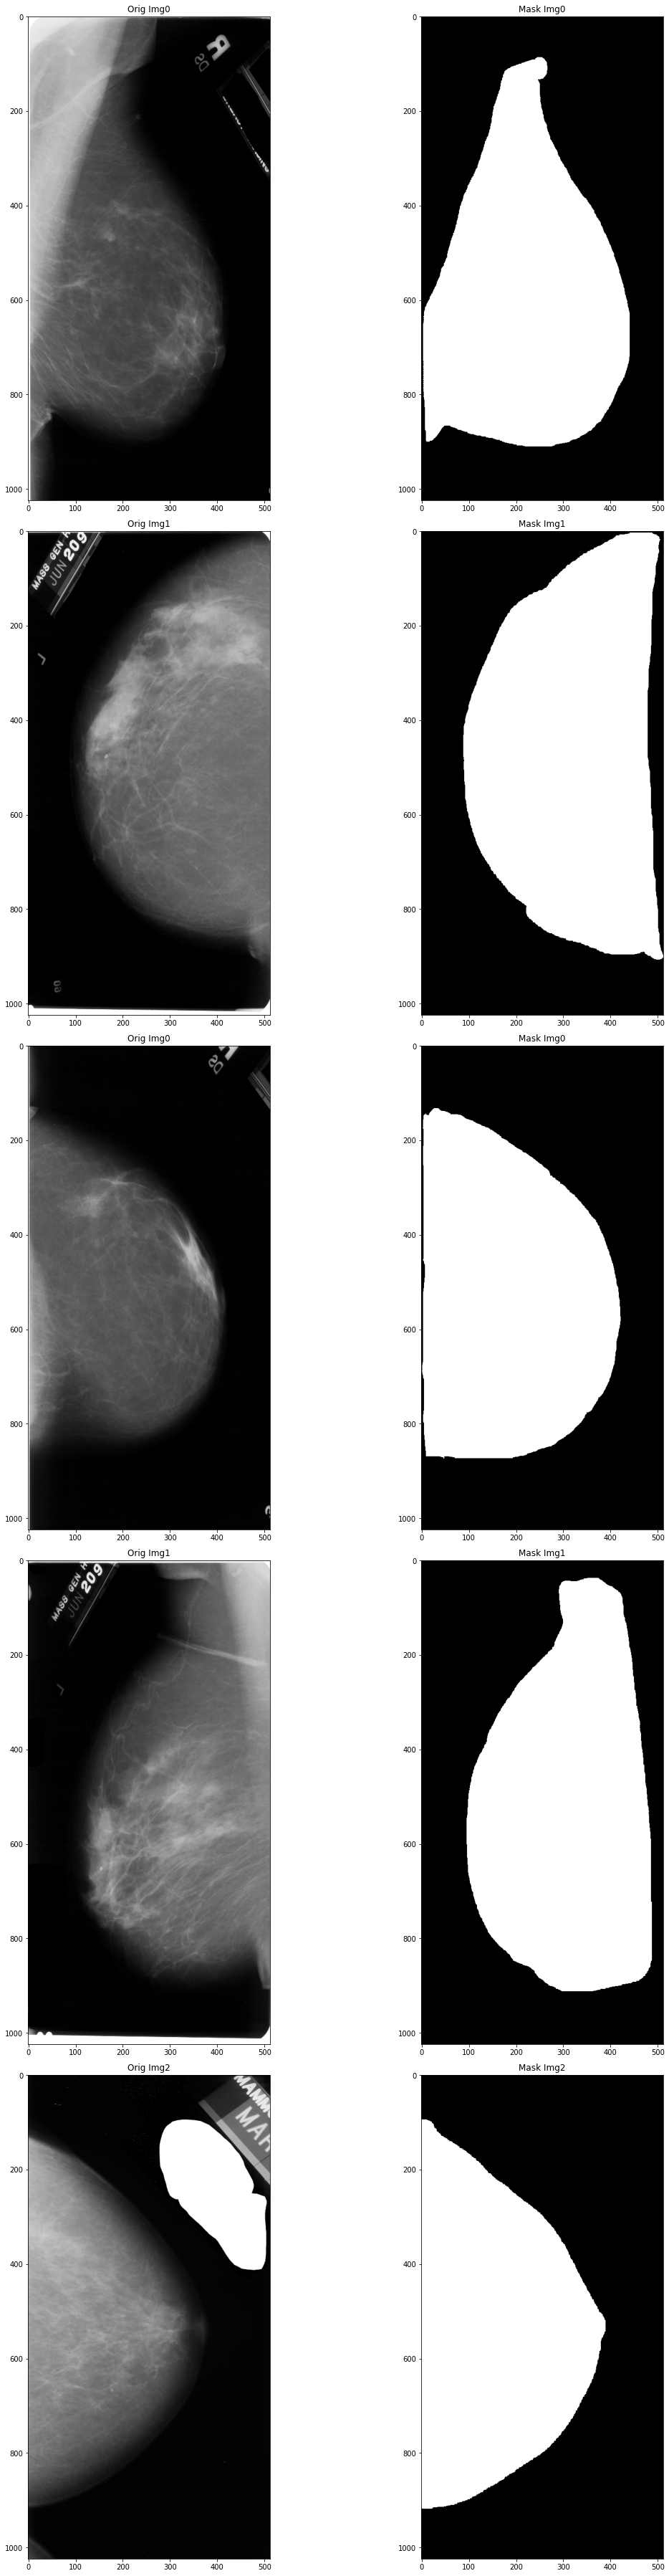

In [3]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np

X_train= pickle.load(open("Datasets/WithMask/X_train.pickle","rb"))
Y_train = pickle.load(open("Datasets/WithMask/y_train.pickle","rb"))
Z_train= pickle.load(open("Datasets/WithMask/Z_train.pickle","rb"))

fig=plt.figure(figsize=(20,50))
rows = 5
columns = 3
i=0
for image,mask,label in zip(X_train[0:5],Y_train[0:5],Z_train[0:5]):
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(image )
    plt.title("Orig Img"+f'{label}' )
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(mask, cmap='gray' )
    plt.title("Mask Img"+f'{label}')
    fig.tight_layout(pad=1)

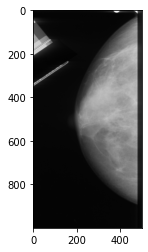

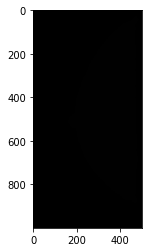

In [12]:
for samplex,sam in X_train:
    plt.imshow(sample)
    plt.show()
    break

In [1]:
import os
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

X_PATH='C:/Users/moham/Desktop/augmented img and mask/aug_images'
Y_PATH='C:/Users/moham/Desktop/augmented img and mask/aug_mask_combined'
IMG_X=512
IMG_Y=512
training_data = []


def create_training_data():
    for img,mask in zip(os.listdir(X_PATH),os.listdir(Y_PATH)):
        img_array = cv2.imread(os.path.join(X_PATH,img))
        resized_img = cv2.resize(img_array,(IMG_X,IMG_Y))
        mask_array = cv2.imread(os.path.join(Y_PATH,mask),0)
        resized_mask = cv2.resize(mask_array,(IMG_X,IMG_Y))
        training_data.append([resized_img,resized_mask])


create_training_data()

X = []
y = []

In [2]:
for img,mask in training_data:
    X.append(img)
    y.append(mask)

X=np.array(X)
y=np.array(y)

In [3]:
print(np.unique(y))

[0 1 2 3]


In [4]:
X = X/255.0

In [6]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

pickle_out = open("Datasets/aug_with_masks/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/aug_with_masks/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/aug_with_masks/Y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/aug_with_masks/Y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

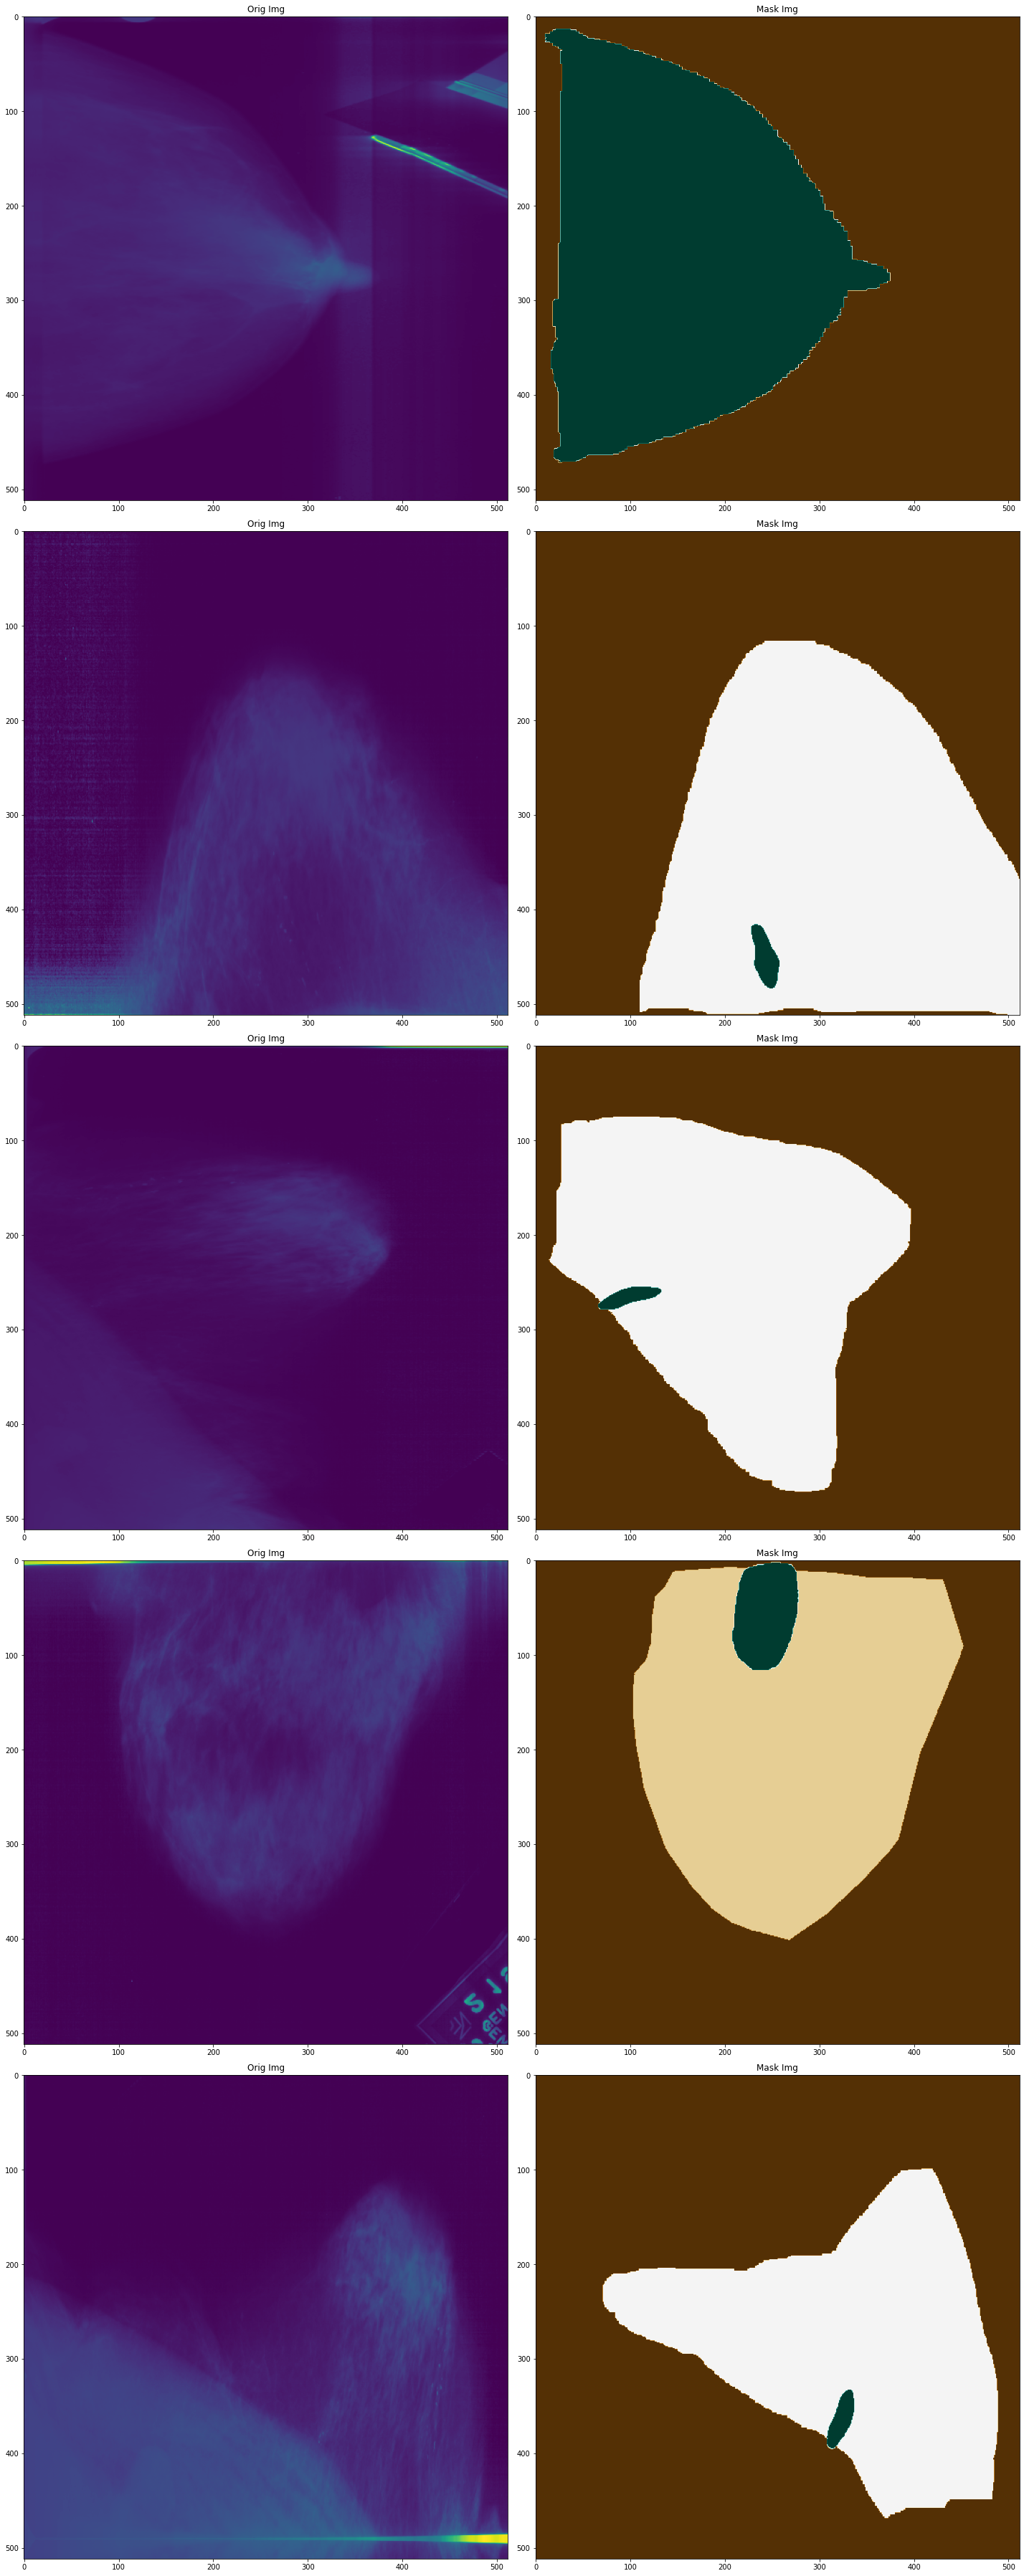

In [8]:
fig=plt.figure(figsize=(20,50))
rows = 5
columns = 2
i=0
for image,mask in zip(X_train[0:5],y_train[0:5]):
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(image )
    plt.title("Orig Img")
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(mask, cmap='BrBG' )
    plt.title("Mask Img")
    fig.tight_layout(pad=1)

In [3]:
import os
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

X_PATH='C:/Users/moham/Desktop/benVcan'
CATEGORIES = ["Benign","Cancer"]
IMG_X=512
IMG_Y=512
training_data = []


def create_training_data():
    totalB=0
    totalC=0
    for category in CATEGORIES:
        img_path=os.path.join(X_PATH,category+'/images')
        msk_path=os.path.join(X_PATH,category+'/masks')
        class_Num=CATEGORIES.index(category)
        for img,mask in zip(os.listdir(img_path),os.listdir(msk_path)):
            if class_Num==0:
                totalB+=1
            if class_Num==1:
                totalC+=1
            img_array = cv2.imread(os.path.join(img_path,img),cv2.IMREAD_COLOR)
            resized_img = cv2.resize(img_array,(IMG_X,IMG_Y))
            mask_array = cv2.imread(os.path.join(msk_path,mask),0)
            resized_mask = cv2.resize(mask_array,(IMG_X,IMG_Y))
            th, im_th = cv2.threshold(resized_mask, 1, class_Num+1,cv2.THRESH_BINARY)
            training_data.append([resized_img,im_th])
            print(img+"----"+mask+"----"+CATEGORIES[class_Num]+"----countB= "+str(totalB)+"----countC= "+str(totalC))
        print(totalB)
        print(totalC)
create_training_data()

A_1123_1.LEFT_CC.png----A_1123_1.LEFT_CC_Mask_FloodFill.png----Benign----countB= 1----countC= 0
A_1123_1.LEFT_MLO.png----A_1123_1.LEFT_MLO_Mask_FloodFill.png----Benign----countB= 2----countC= 0
A_1124_1.LEFT_CC.png----A_1124_1.LEFT_CC_Mask_FloodFill.png----Benign----countB= 3----countC= 0
A_1124_1.LEFT_MLO.png----A_1124_1.LEFT_MLO_Mask_FloodFill.png----Benign----countB= 4----countC= 0
A_1170_1.RIGHT_CC.png----A_1170_1.RIGHT_CC_Mask_FloodFill.png----Benign----countB= 5----countC= 0
A_1170_1.RIGHT_MLO.png----A_1170_1.RIGHT_MLO_Mask_FloodFill.png----Benign----countB= 6----countC= 0
A_1177_1.RIGHT_CC.png----A_1177_1.RIGHT_CC_Mask_FloodFill.png----Benign----countB= 7----countC= 0
A_1177_1.RIGHT_MLO.png----A_1177_1.RIGHT_MLO_Mask_FloodFill.png----Benign----countB= 8----countC= 0
A_1242_1.LEFT_CC.png----A_1242_1.LEFT_CC_Mask_FloodFill.png----Benign----countB= 9----countC= 0
A_1242_1.LEFT_MLO.png----A_1242_1.LEFT_MLO_Mask_FloodFill.png----Benign----countB= 10----countC= 0
A_1259_1.LEFT_CC.png-

In [4]:
X = []
y = []

In [5]:
for img,mask in training_data:
    X.append(img)
    y.append(mask)

X=np.array(X)
y=np.array(y)

In [6]:
print(len(np.unique(y)))

3


In [7]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

pickle_out = open("Datasets/benVCan_with_Mask_512/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/benVCan_with_Mask_512/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/benVCan_with_Mask_512/Y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/benVCan_with_Mask_512/Y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()


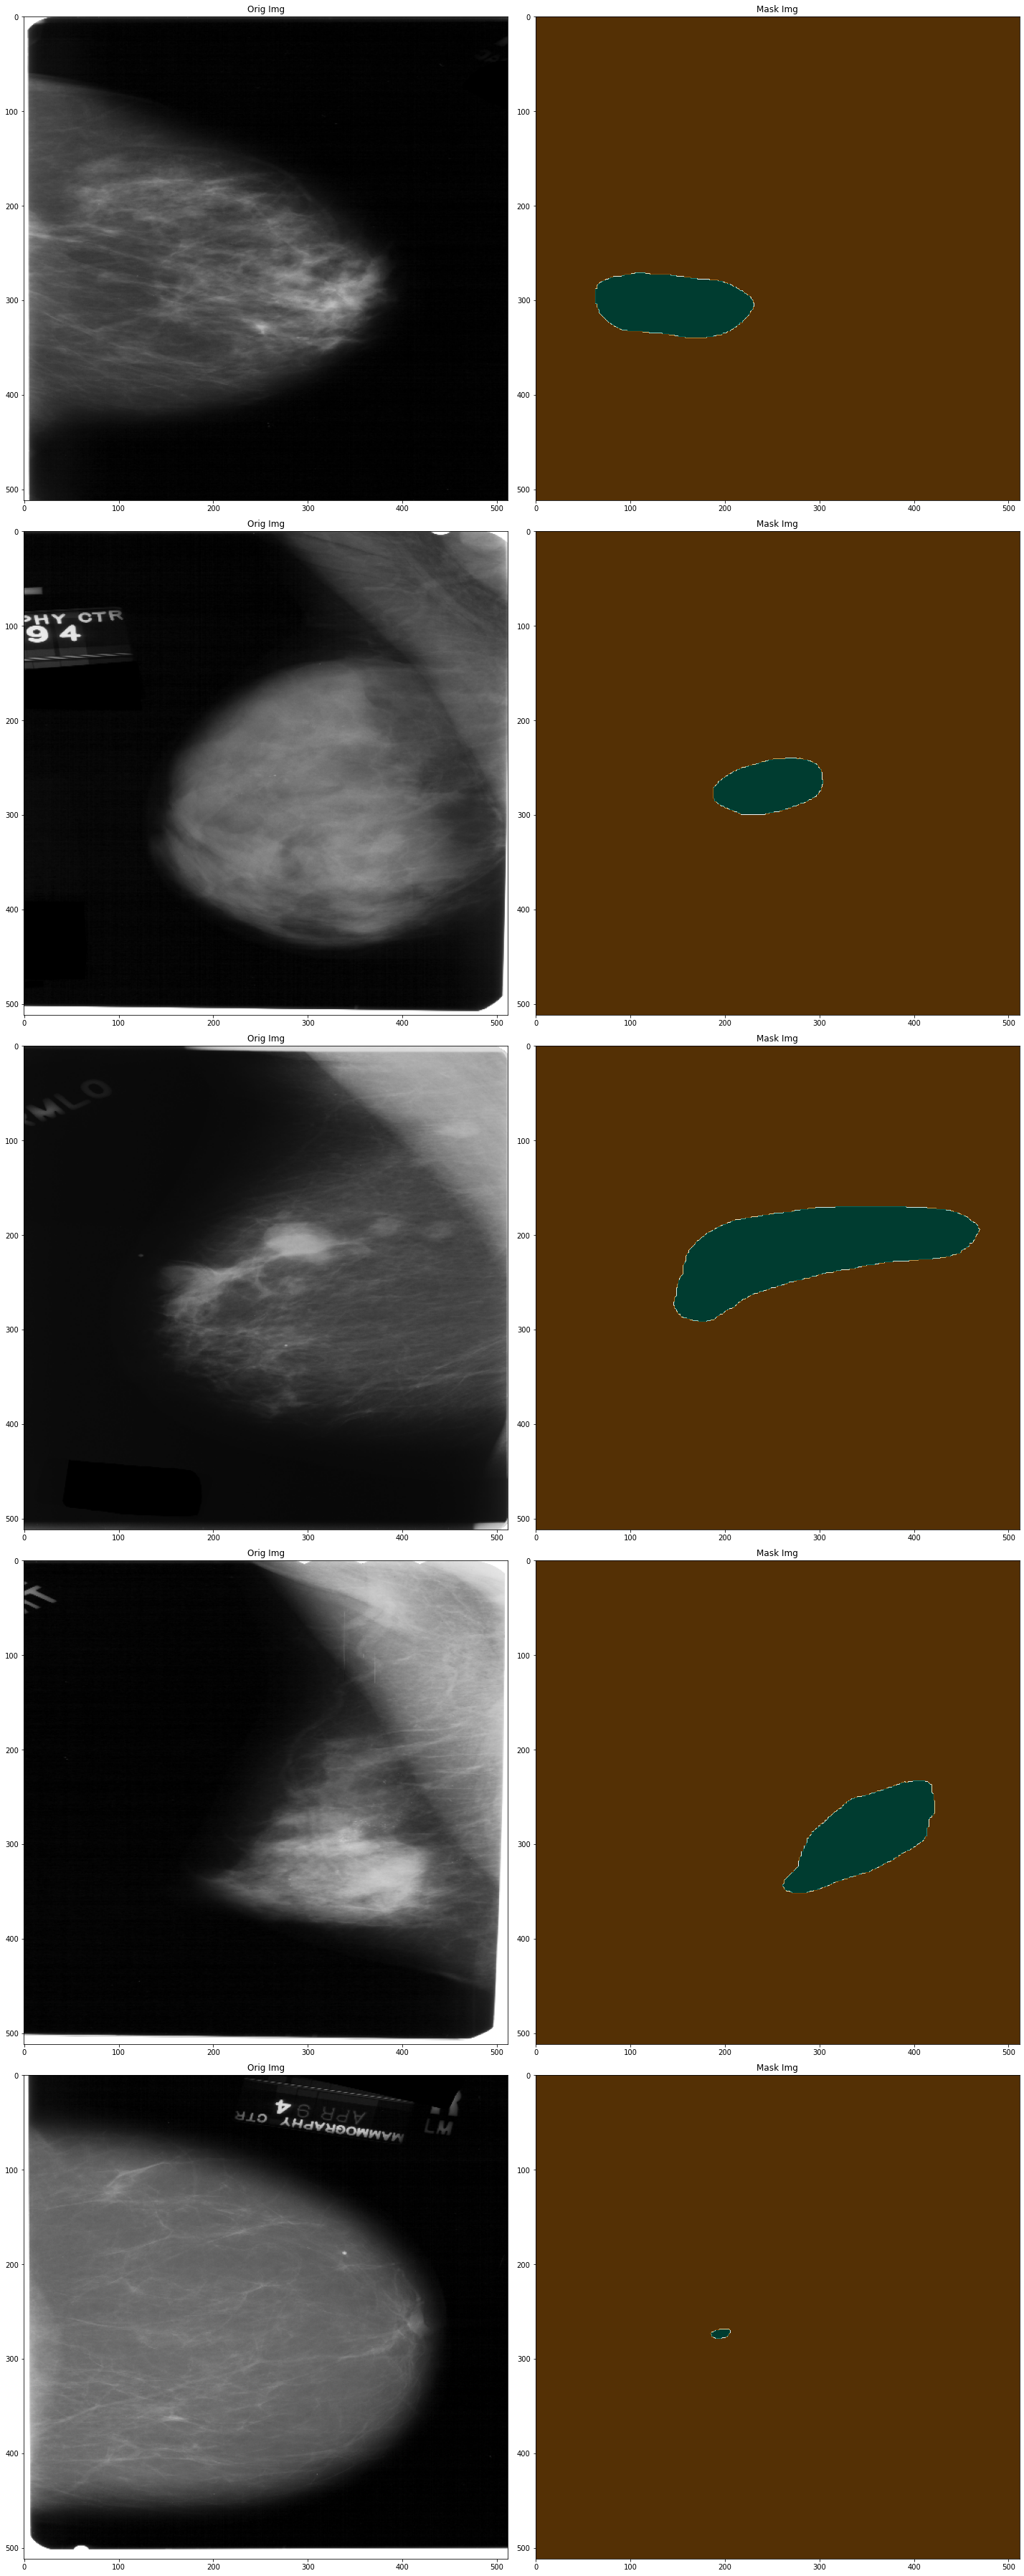

In [8]:
fig=plt.figure(figsize=(20,50))
rows = 5
columns = 2
i=0
for image,mask in zip(X_train[0:5],y_train[0:5]):
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(image )
    plt.title("Orig Img")
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(mask, cmap='BrBG' )
    plt.title("Mask Img")
    fig.tight_layout(pad=1)

In [1]:
import os
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

X_PATH='C:/Users/moham/Desktop/augmented img and mask/split/first10k/images'
Y_PATH='C:/Users/moham/Desktop/augmented img and mask/split/first10k/masks'
IMG_X=256
IMG_Y=256
training_data = []


def create_training_data():
    i=0
    for img,mask in zip(os.listdir(X_PATH),os.listdir(Y_PATH)):
        img_array = cv2.imread(os.path.join(X_PATH,img))
        resized_img = cv2.resize(img_array,(IMG_X,IMG_Y))
        mask_array = cv2.imread(os.path.join(Y_PATH,mask),0)
        resized_mask = cv2.resize(mask_array,(IMG_X,IMG_Y))
        training_data.append([resized_img,resized_mask])
        i=i+1
        if i==5000:
            break


create_training_data()

X = []
y = []

In [2]:
for img,mask in training_data:
    X.append(img)
    y.append(mask)

X=np.array(X)
y=np.array(y)

In [3]:
print(np.unique(y))

[0 1 2 3]


In [4]:
X = X/255.0

In [5]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20)

pickle_out = open("Datasets/WithMask256_first_10k_5k/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask256_first_10k_5k/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

# X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.25)

pickle_out = open("Datasets/WithMask256_first_10k_5k/X_val.pickle", "wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/WithMask256_first_10k_5k/y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

# pickle_out = open("Datasets/WithMask256/X_test.pickle", "wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()
#
# pickle_out = open("Datasets/WithMask256/y_test.pickle", "wb")
# pickle.dump(y_test, pickle_out)
# pickle_out.close()
